In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

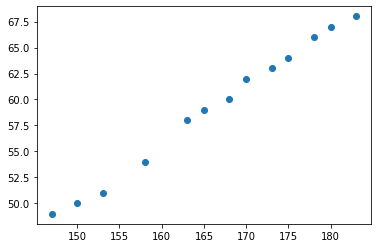

In [67]:
# data_set
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T 
y = np.array([ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

plt.scatter(X, y)

## w = (X * X.T) * Xy

In [68]:
# Building (Feature Matrix)
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1) # Bias trick
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [69]:
# Calculating (weights) of the linear regression model
A = np.dot(Xbar.T, Xbar)
A = np.linalg.pinv(A) # pseudo inverse
b = np.dot(Xbar.T, y)
w = np.dot(A, b)
w_0, w_1 = w[0], w[1]

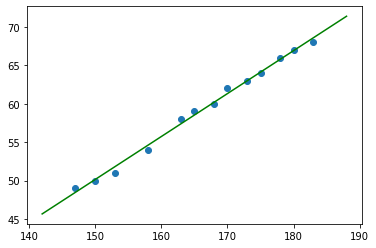

In [70]:
x_min = (X.min()-5)
x_max = (X.max()+5)
y_min = w_1* x_min + w_0
y_max = w_1* x_max + w_0

plt.scatter(X, y)
plt.plot((x_min, x_max), (y_min, y_max), color='green')

In [73]:
# Testing with Scikit-learn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print("Scikit-learn's solution: w_1 = ", model.coef_[0], "w_0 = ", model.intercept_)
print("Our solution: w_1 = ", w_1, "w_0 = ", w_0)

scikit-learn's solution: w_1 =  0.5592049619396674 w_0 =  -33.73541020580774
our solution: w_1 =  0.5592049619425978 w_0 =  -33.735410206296365


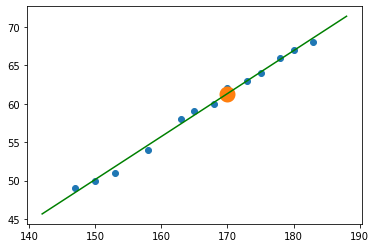

In [71]:
# Testing new data point
x_test = 170
y_hat = x_test*w_1 + w_0


plt.scatter(X, y)
plt.plot((x_min, x_max), (y_min, y_max), color='green')
plt.scatter(x_test, y_hat, linewidths=10)